# Descriptive Statistics (Module 1 - Lesson 1) Visual Analytics

![Klee - Visual Analytics](https://github.com/nikbearbrown/Visual_Analytics/blob/main/IMG/Klee_Visual_Analytics.png?raw=true)


YouTube - https://www.youtube.com/c/NikBearBrown    
GitHub - https://github.com/nikbearbrown/Visual_Analytics   
Kaggle - https://www.kaggle.com/nikbearbrown   
Klee.ai (Visual AI) - http://klee.ai    



### This lesson

Garbage-In Garbage Out (GIGO) may be the most widely used maxim in machine learning, but how does one assess the quality of data in an analysis pipeline? This lesson focuses on logging metrics related to the quality of a tabular (.csv style) dataset. Other lessons will focus on logging  metrics related other kinds of data such as image and audio data. Other lessons will focus on creating effective visualiztion of these logs.

A descriptive model describes a system and its relationships. For checking the quality of data this involves descriptive statistics and data visualization.  This notebook will focus on generating statistics related to data quality.  The next notebook I will focus on generating visualization related to data quality.

Descriptive Statistics gives a brief overview of the charactieristics of dataset. We try to summarize a given dataset. It consists of two basic categories of measures: measures of central tendency and measures of variability (or spread).

### Usage

This notebook expects tabular (.csv) style data like those commonly found on [https://www.kaggle.com/](Kaggle).  

### Data 

The data we will use for this lab is from the [NYC Property Sales](https://www.kaggle.com/c/zillow-prize-1/data)

A year's worth of properties sold on the NYC real estate market.

_Inspiration_   

What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market, or build a model that predicts sale value in the future?

_Step 1 Look at and understand the data_  

We may have many questions about these data but the first step in statistical learning is exploratory data analysis (EDA). 

### Excercise 1 (15 minutes)

For this course you will need to find groups of one to three. Groups of two or three is recommended.

To "Show and Tell One" you will need to:

1)  Find a group.  
2)  Find a Kaggle dataset that is not "NYC Property Sales" or a data set that another group is using and is tabular ".csv style" data. Post your group dataset to the #ENGR_5963 channel on the NEU AI Skunkworks slack. The datasets are "first-come first serve."  Slack [https://join.slack.com/t/neuaiskunkworks/shared_invite/zt-9h3ckfg2-YR2h6xsTURhLKKRlQpxSzQ](https://join.slack.com/t/neuaiskunkworks/shared_invite/zt-9h3ckfg2-YR2h6xsTURhLKKRlQpxSzQ)  

Join channel ENGR_5963   

3)  Come up with a list of specific questions that one might have for a new data set. For example, "Are there missing values?" or "What are the data types of each field?"

### Dataset Description

Properties sold in New York City over a 12-month period from September 2016 to September 2017.

#### Context
This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.   

#### Content 

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:   

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).   

BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.    

BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.   


### Questions for a novel data set
- Detec Categorical Features Vs Numerical Features
- Missing data, such as features with empty values.
- Mean of the features
- Median of the features
- Standard Deviation of the features
- Visual of the Spread of the data 
- Labels treated as features, so that your model gets to peek at the right answer during training.
- Features with values outside the range you expect.

### Libraries used 
- We use ``TensorFlow Data Validation(TFDV)`` to investigate and visualize the dataset. Understanding the input data is the most important step in building the data Science pipeline, as it can potentially harm model's prediction. 

#### Input: 
The input to this notebook is a tabular dataset.

#### Output:
The output are log files of statistics generated from the dataset related to its quality and visualization related to data quality.

In [1]:
## install the library 
## uncomment the lines below if tenforflow is not installed

# print('Installing TensorFlow Data Validation')
# !pip install -q tensorflow_data_validation[visualization]

### Load libraries

In [2]:
# imports 
import pandas as pd
import pandas.util.testing as tm
import tensorflow as tf
import tensorflow_data_validation as tfdv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook

print('TF version: {}'.format(tf.__version__))
print('TFDV version: {}'.format(tfdv.version.__version__))

%matplotlib inline

/var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/ipykernel_17681/1990792137.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TF version: 2.7.0
TFDV version: 1.5.0


### Install any missing libraries

If you are getting errors after the import step it means you need to install the missing libraires.

You can create an environment, use conda or pip.


At the command line use
```python
pip install tensorflow
```

In a jupyter or colab notebook use

```python
!pip install -q tensorflow_data_validation[visualization]
```

Rerun the import cel to check that everything installed.

### Load the dataset

Let's take a quick look that we are loading the correct data.

In [3]:
url = "https://github.com/nikbearbrown/Visual_Analytics/raw/main/CSV/nyc-rolling-sales.csv"
df=pd.read_csv(url)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,12/14/16 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,12/9/16 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00


### Size of data and column names

Let's check the size of the data and the column names. Note that 'X' is a common notion for the independent variables so we will use this notation.

The independent variables are predictor variables.
If one is doing supervised learning then the target or predicted variable or dependent variable is  commonly notated 'y'.  Obviously any member of X can be chosen as a target.


In [4]:
# What does this tell you? Why isn't it df.shape()?
print(df.shape)

# What are the variable names?
X=df.columns.values.tolist()
print(X)

# How many variables?
print(len(X))

(84548, 21)
['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']
21


### Notes so far  

1. We have a fair amount of data with over 84K rows.
2. The variables all seem related to real estate we some likely to be correlated.
3. SALE PRICE is a likely target variable for an analysis.




### Structure of your notebooks 

In your notebooks, whenever you do an analysis you need to answer these three questions.

1. What is the question/assertion? (e.g. Are the missing values)    
2. What is the analysis? (e.g. Used Pandas to check for missing values)   
3. What are the results? (e.g. A table showing how many missing values each column has)   




### Find missing values and zero values

In [5]:
# Find missing values. What does this tell you?
missing_values_count = df.isnull().sum()
missing_values_count

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

### Notes

1. There are no missing values 


In [6]:
# Find zero values. What does this tell you? Does this make sense?
zero_values_count = df.isin([0]).sum()
zero_values_count

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                            982
RESIDENTIAL UNITS                 24783
COMMERCIAL UNITS                  79429
TOTAL UNITS                       19762
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

### Notes

1. Zero seems to be used as a null value. For example, it is unlikely that NYC properties were built in the year zero or are in the '0' zip code.  
2.  The dataset seems to be using a '-' for a null value. This will cause a lot of problems


In [7]:
# Identify object columns
print(df.select_dtypes(['object']).columns)

# Identify integer columns
print(df.select_dtypes(['int64']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')
Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


In [8]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,12/14/16 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,12/9/16 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00


### Notes

Note that some columns like NEIGHBORHOOD should be catgegorical, while others like SALE PRICE should be numeric. The '-' in SALE PRICE causes a lot of confusion. 'SALE DATE' should be a date.  Conversly some numeric columns like ZIP CODE should be categrocial.


In [9]:
# Convert numeric to categorical variables
actually_categorical = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE','TAX CLASS AT TIME OF SALE'
,'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE']                       
for col in actually_categorical:
    df[col] = df[col].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  category
 5   LOT                             84548 non-null  category
 6   EASE-MENT                       84548 non-null  category
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  category
 9   APARTMENT NUMBER                84548 non-null  category
 10  ZIP CODE                        84548 non-null  category
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

### Notes

Successfully converted many objects to category.

In [11]:
# Note that the '-' in fields like SALE PRICE force us to coerce for missing values
# Otherwise one could use .astype(numeric)
numeric = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']
for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  category
 5   LOT                             84548 non-null  category
 6   EASE-MENT                       84548 non-null  category
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  category
 9   APARTMENT NUMBER                84548 non-null  category
 10  ZIP CODE                        84548 non-null  category
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

In [13]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,7/19/17 0:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,12/14/16 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,12/9/16 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,9/23/16 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,11/17/16 0:00


In [14]:
# Find missing values. What does this tell you?
missing_values_count = df.isnull().sum()
missing_values_count

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

### Dealing with date fields

We should also convert the date, SALE DATE, to a datetime

In [15]:
# Convert to date object
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   EASE-MENT                       84548 non-null  category      
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  category      
 9   APARTMENT NUMBER                84548 non-null  category      
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [17]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


### Notes

Successfully converted many objects to numeric.     
No data was lost.    
The '-' was properly converted to Nan.   
SALE DATE was properly converted to datetime.  
There is no missing data. We will discuss this later in the module on imputing data.

### Excercise 2 (5 minutes)

Discuss with your group.

1. Do these data types make sense for NYC Property Sales?
2. In the lab, with your group dataset answer the question of whether the data types make sense.
3. In your individual porfolio project make sure you address the question of whether the data types make sense.

### Descriptive statistics

Descriptive statistics are  coefficients that summarize a variable, which can be either a representation of the entire or a sample of a population.  Descriptive statistics are broken down into measures of frequency, measures of central tendency, measures of dispersion or variation (spread), and measures of position.

#### Measures of Frequency  
* Statistics: Count, Percent, Frequency   
* Shows how often something occurs  

#### Measures of Central Tendency   
* Statistics:  Mean, Median, and Mode   
* Locates the distribution by various points  

#### Measures of Dispersion or Variation
* Statistics: Range, Variance, Standard Deviation  
* Identifies the spread of scores by stating intervals  
* Range = High/Low points  
* Variance or Standard Deviation = difference between observed score and mean  
* Measures of "spread"  


#### Measures of Position
* Statistics: Percentile Ranks, Quartile Ranks   
* Describes how scores fall in relation to one another. Relies on standardized scores   
* Use this when you need to compare a value to where it falls in a population    

*YouTube*

Descriptive Statistics vs Inferential Statistics https://youtu.be/VHYOuWu9jQI


In [18]:
# Descriptive statistics
descriptive_statistics=df.describe()
descriptive_statistics

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,6.998700e+04
mean,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.276456e+06
std,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,1.140526e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,2.250000e+05
50%,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,5.300000e+05
75%,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,9.500000e+05
max,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


### Excercise 3 (10 minutes)

Note that these statitics are only for the numeric columns. We will discuss statitics are for the categorical columns later.

1. Do these statistics make sense?  For example there are houses built in NYC in the year zero. Do you think inccurate values can through the statistics off?  
2. Do you think the SALE PRICE is dependent on the SALE DATE? If a house was sold in 1990, would the SALE PRICE be the price when last sold or the actual sale price if sold today?


### Descriptive statistics with tfdv

Here we use ``tfdv.generate_statistics_from_csv()`` to compute statistics for the training dataset. TFDV can compute descriptive statistics to provide a quick overview of the data. Other option is to use directly the dataframe ``tfdv.generate_statistics_from_dataframe()``
- Numeric features and catagorical features are visualized separately, and that charts are displayed showing the distributions for each feature.
- Features with missing or zero values display a percentage in red as a visual indicator that there may be issues with examples in those features. The percentage is the percentage of examples that have missing or zero values for that feature.
- Click "expand" above the charts to change the display
- Hovering over bars in the charts to display bucket ranges and counts
- Switch between the log and linear scales, and notice how the log scale reveals much more detail 
- Select "quantiles" from the "Chart to show" menu, and hover over the markers to show the quantile percentages


tfdv.generate_statistics_from_csv() requires ``tensorflow`` and ``tensorflow_data_validation``  

```python
import tensorflow as tf
import tensorflow_data_validation as tfdv
```

In [19]:
# Descriptive statistics with tfdv
tfdv_stats = tfdv.generate_statistics_from_dataframe(df)

In [20]:
# dictionary format of the output
tfdv_stats

datasets {
  num_examples: 84548
  features {
    type: STRING
    string_stats {
      common_stats {
        num_non_missing: 84548
        min_num_values: 1
        max_num_values: 1
        avg_num_values: 1.0
        num_values_histogram {
          buckets {
            low_value: 1.0
            high_value: 1.0
            sample_count: 8454.8
          }
          buckets {
            low_value: 1.0
            high_value: 1.0
            sample_count: 8454.8
          }
          buckets {
            low_value: 1.0
            high_value: 1.0
            sample_count: 8454.8
          }
          buckets {
            low_value: 1.0
            high_value: 1.0
            sample_count: 8454.8
          }
          buckets {
            low_value: 1.0
            high_value: 1.0
            sample_count: 8454.8
          }
          buckets {
            low_value: 1.0
            high_value: 1.0
            sample_count: 8454.8
          }
          buckets {
            low

### Notes

tfdv_stats is intended for a data pipeline and these stats to be logged as part of a production system but allows for a visualization in a notebook by using ``tfdv.visualize_statistics``  

We will discuss visualization of data in detail in other modules but take a look at the tfdv visualizations for now.  


In [21]:
# visual output of the statistics from the dataset
tfdv.visualize_statistics(tfdv_stats)

### Excercise 4 (10 minutes)

With the group.

1. Identify an interesting tfdv visualization and explain what it means.



## Schema for the data
We use ``tfdv.infer_schema`` to create a schema for the data. It can be understood as documentation of the data, when multiple people are working on a particular dataset.
The schema describes:
- which features are expected to be present
- their type
- the number of values for a feature in each example
- the presence of each feature across all examples
- the expected domains of features.

In [22]:
schema = tfdv.infer_schema(statistics=tfdv_stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'BOROUGH',STRING,required,,'BOROUGH'
'NEIGHBORHOOD',BYTES,required,,-
'BUILDING CLASS CATEGORY',STRING,required,,'BUILDING CLASS CATEGORY'
'TAX CLASS AT PRESENT',STRING,required,,'TAX CLASS AT PRESENT'
'BLOCK',BYTES,required,,-
'LOT',BYTES,required,,-
'EASE-MENT',STRING,required,,'EASE-MENT'
'BUILDING CLASS AT PRESENT',BYTES,required,,-
'ADDRESS',BYTES,required,,-


,Values
Domain,
'BOROUGH',"'', '', '', '', ''"
'BUILDING CLASS CATEGORY',"'01 ONE FAMILY DWELLINGS ', '02 TWO FAMILY DWELLINGS ', '03 THREE FAMILY DWELLINGS ', '04 TAX CLASS 1 CONDOS ', '05 TAX CLASS 1 VACANT LAND ', '06 TAX CLASS 1 - OTHER ', '07 RENTALS - WALKUP APARTMENTS ', '08 RENTALS - ELEVATOR APARTMENTS ', '09 COOPS - WALKUP APARTMENTS ', '10 COOPS - ELEVATOR APARTMENTS ', '11 SPECIAL CONDO BILLING LOTS ', '11A CONDO-RENTALS ', '12 CONDOS - WALKUP APARTMENTS ', '13 CONDOS - ELEVATOR APARTMENTS ', '14 RENTALS - 4-10 UNIT ', '15 CONDOS - 2-10 UNIT RESIDENTIAL ', '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ', '17 CONDO COOPS ', '18 TAX CLASS 3 - UNTILITY PROPERTIES ', '21 OFFICE BUILDINGS ', '22 STORE BUILDINGS ', '23 LOFT BUILDINGS ', '25 LUXURY HOTELS ', '26 OTHER HOTELS ', '27 FACTORIES ', '28 COMMERCIAL CONDOS ', '29 COMMERCIAL GARAGES ', '30 WAREHOUSES ', '31 COMMERCIAL VACANT LAND ', '32 HOSPITAL AND HEALTH FACILITIES ', '33 EDUCATIONAL FACILITIES ', '34 THEATRES ', '35 INDOOR PUBLIC AND CULTURAL FACILITIES ', '36 OUTDOOR RECREATIONAL FACILITIES ', '37 RELIGIOUS FACILITIES ', '38 ASYLUMS AND HOMES ', '39 TRANSPORTATION FACILITIES ', '40 SELECTED GOVERNMENTAL FACILITIES ', '41 TAX CLASS 4 - OTHER ', '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC ', '43 CONDO OFFICE BUILDINGS ', '44 CONDO PARKING ', '45 CONDO HOTELS ', '46 CONDO STORE BUILDINGS ', '47 CONDO NON-BUSINESS STORAGE ', '48 CONDO TERRACES/GARDENS/CABANAS ', '49 CONDO WAREHOUSES/FACTORY/INDUS '"
'TAX CLASS AT PRESENT',"' ', '1', '1A', '1B', '1C', '2', '2A', '2B', '2C', '3', '4'"
'EASE-MENT',' '
'TAX CLASS AT TIME OF SALE',"'', '', '', ''"


### Notes

1. 'TAX CLASS AT PRESENT' has the following values ' ', '1', '1A', '1B', '1C', '2', '2A', '2B', '2C', '3', '4'
maybe ' ' really means "unknown"
2. 'TAX CLASS AT TIME OF SALE' has strange values '', '', '', ''
3. 'EASE-MENT' only has one value ' '
4. 'BOROUGH' has strange values  '', '', '', ''



### Skewness discussion

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

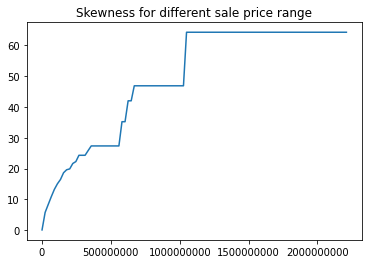

In [23]:
# What does this tell you?
x = np.linspace(9.500000e+05,2.210000e+09, num=100)

y = [df[(df['SALE PRICE'] < x_range)]['SALE PRICE'].skew() for x_range in x]
sns.lineplot(x=x,y=y)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Skewness for different sale price range')
plt.show()

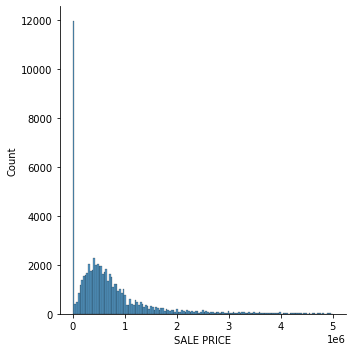

In [24]:
# What does this tell you?
sns.displot(df[(df['SALE PRICE'] < 5e+06)]['SALE PRICE'])

In [25]:
# Find zero values. What does this tell you? Does this make sense?
zero_values_count = df.isin([0]).sum()
zero_values_count

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                            982
RESIDENTIAL UNITS                 24783
COMMERCIAL UNITS                  79429
TOTAL UNITS                       19762
LAND SQUARE FEET                  10326
GROSS SQUARE FEET                 11417
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        10228
SALE DATE                             0
dtype: int64

### Excercise 5 (10 minutes)

With the group.

1. How would you expect house prices to be disributed?
2. Do you think the prices may be skewed low? Why?
3. What visualizations might you want to create for house prices? Commercial versus retail? Geographic price map?
Sale date versus price?  Size versus price?  
4. Why so many zeros? Do you think that over 10K houses sold for zero dollars in NYC?


### Correlation between the features

Are there any correlated features?

*YouTube*

The Correlation Coefficient - Explained in Three Steps https://youtu.be/ugd4k3dC_8Y


In [26]:
#Correlation between the features
corr = df.corr()
corr

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
RESIDENTIAL UNITS,1.000000,0.015653,0.888309,0.397929,0.697231,0.025380,0.119698
COMMERCIAL UNITS,0.015653,1.000000,0.472998,0.038954,0.069400,0.006428,0.046006
TOTAL UNITS,0.888309,0.472998,1.000000,0.368495,0.647542,0.024568,0.125101
LAND SQUARE FEET,0.397929,0.038954,0.368495,1.000000,0.642950,-0.021124,0.060183
GROSS SQUARE FEET,0.697231,0.069400,0.647542,0.642950,1.000000,0.027024,0.455423
YEAR BUILT,0.025380,0.006428,0.024568,-0.021124,0.027024,1.000000,-0.003539
SALE PRICE,0.119698,0.046006,0.125101,0.060183,0.455423,-0.003539,1.000000


<AxesSubplot:>

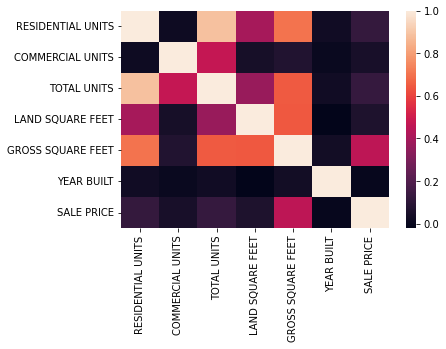

In [27]:
sns.heatmap(corr)

### Excercise 6 (10 minutes)

With the group.

1. Are there any correlated features? Do they make sense?
2. What would a negative correlation between land square feet and year built mean?


### Categorical value counts

We will discuss analyzing categorical variables more as we discuss data visualization. For now let's look the value counts in the BUILDING CLASS CATEGORY.

In [28]:
vc=df['BUILDING CLASS CATEGORY'].value_counts()
vc

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

In [29]:
# Calculate the proportion (i.e. probability) of each class
col='BUILDING CLASS CATEGORY'
vc_prob=pd.DataFrame(df[col].value_counts(normalize=True))
vc_prob.index.name = col
vc_prob.columns = ['Probability']
vc_prob

,Probability
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,0.215676
02 TWO FAMILY DWELLINGS,0.187207
13 CONDOS - ELEVATOR APARTMENTS,0.153629
10 COOPS - ELEVATOR APARTMENTS,0.152600
03 THREE FAMILY DWELLINGS,0.051852
07 RENTALS - WALKUP APARTMENTS,0.040994
09 COOPS - WALKUP APARTMENTS,0.032727
04 TAX CLASS 1 CONDOS,0.019587
44 CONDO PARKING,0.017044


In [30]:
number_of_categories=vc_prob.shape[0]
print(number_of_categories)

47


### Shannon entropy

The notion of using entropy as a measure of change in system state and dynamics comes both from [statistical physics](https://en.wikipedia.org/wiki/Entropy) and from [information theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)). In statistical physics, entropy is a measure of disorder and uncertainty in a random variable; the higher the entropy, the greater the disorder. In the statistical physics context, the term usually refers to [Gibbs entropy](https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)), which measures the macroscopic state of the system as defined by a distribution of atoms and molecules in a thermodynamic system. Gibbs entropy is a measure of the disorder in the arrangements of its particles. As the position of a particle becomes less predictable, the entropy increases. For a classical system (i.e., a collection of classical particles) with a discrete set of microstates, if $E_i$ is the energy of microstate $i$, and $p_i$ is the probability that it occurs during the system's fluctuations, then the entropy of the system is

$$
S = -k_\text{B}\,\sum_i p_i \ln \,p_i
$$

The quantity $k_\text{B}$ is a physical constant known as [Boltzmann's constant](https://en.wikipedia.org/wiki/Boltzmann_constant), which, like the entropy, has units of heat capacity. The logarithm is dimensionless.

In information theory, entropy is also a measure of the uncertainty in a random variable. In this context, however, the term usually refers to the [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)), which quantifies the expected value of the information contained in a message (or the expected value of the information of the probability distribution). The concept was introduced by [Claude E. Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) in his 1948 paper "A Mathematical Theory of Communication." Shannon entropy establishes the limits to possible data compression and channel capacity.  That is, the entropy gives a lower bound for the efficiency of an encoding scheme (in other words, a lower bound on the possible compression of a data stream). Typically this is expressed in the number of ‘bits’ or ‘nats’ that are required to encode a given message. Given the probability of each of n events, the information required to predict an event is the distribution’s entropy. 

Low entropy means the system is very ordered, that is, very predictable. High entropy means the system is mixed, that is, very unpredictable; a lot of information is needed for prediction. 

The Shannon entropy can explicitly be written as

$$
E(X) = \sum_{i} {\mathrm{P}(x_i)\,\mathrm{I}(x_i)} = -\sum_{i} {\mathrm{P}(x_i) \log_b \mathrm{P}(x_i)},
$$

where b is the base of the logarithm used. Common values of b are 2, Euler's number $e$, and 10, and the unit of entropy is shannon for b = 2, nat for b = e, and hartley for b = 10.When b = 2, the units of entropy are also commonly referred to as bits.

The Shannon entropy is by far the most common information-theoretic measure there are others. Other information-theoretic measures include: plog,Rényi entropy, Hartley entropy, collision entropy, min-entropy, Kullback-Leibler divergence and the information dimension.

The Shannon entropy is the Rényi entropy with an alpha of one (see appendix). The Shannon entropy is a simple estimate of the expected value of the information contained in a message. It assumes independence and identically distributed random variables, which is a simplification when applied to word counts. In this sense it is analogous to naïve Bayes, in that it is very commonly used and thought to work well in spite of violating some assumptions upon which it is based.

The limiting value of $H_\alpha as \alpha \rightarrow 1$ is the Shannon entropy:

$$
H_1(X) = - \sum_{i=1}^n p_i \log p_i. 
$$


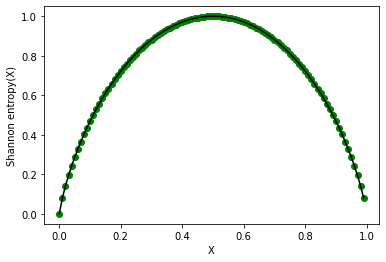

In [31]:
def shannon_entropy(p):   
    return (-p *np.log2(p) - (1-p)*np.log2(1-p))

base=0.0000000001
x = np.arange(base, 1.0-base, 0.01)


plt.figure(1)
plt.plot(x, shannon_entropy(x), 'go', x, shannon_entropy(x), 'k')
plt.ylabel('Shannon entropy(X)')
plt.xlabel('X')
plt.show()

### Notes

Even though the Shannon entropy uses probabilty it is a measure of uncertainty.  If we are completely certain of an outcome $\mathrm{P}(X) = 1$ or $\mathrm{P}(X) = 0$ the Shannon entropy will be zero. If we are completely uncertain of an outcome $\mathrm{P}(X) = 0.5$ the Shannon entropy will take its maximum value of 1.



*Gini coefficient*

The _Gini coefficient_ is a very similar measure to the Shannon entropy. The Gini coefficient measures the inequality among values of a frequency distribution (for example, levels of income). A Gini coefficient of zero expresses perfect equality, where all values are the same (e.g. where everyone has the same income). A Gini coefficient of one (or 100%) expresses maximal inequality among values (e.g. for a large number of people where only one person has all the income or consumption and all others have none, the Gini coefficient will be nearly one).

The _Gini coefficient_ can be calculated as follows:

$$
Gini(X) = - \sum_{i=1}^n p_i^{2} 
$$


In [32]:
# Chwck that the probabilities sum to 1
vc_prob['Probability'].sum()

0.9999999999999998

In [33]:
from scipy.stats import entropy
import math
E = entropy(vc_prob['Probability'])
print(E)
print(number_of_categories)
max_entropy=math.log(number_of_categories,2)
print(max_entropy)
print(math.log(2,2))
print(E/max_entropy)

2.4014003865098066
47
5.554588851677638
1.0
0.43232729741725495


### Why is the Shannon entropy above 1?


The maximum value of entropy is log𝑘, where 𝑘 is the number of categories you are using. Its numeric value will naturally depend on the base of logarithm. In our previous plot we used a coin flip, yes or no, which has two classes so the max value in the case is 1.


In view of this it is fairly common to scale entropy by log𝑘, so that results then do fall between 0 and 1.

As a side note, the Shannon entropy measures the "information" or "uncertainty" of a random variable. When you are using base 2, it is measured in bits; and there can be more than one bit of information in a variable.

In this example, the variable "contains" about 2.4 bits of information. In other words, if you were able to compress a series of samples perfectly, you would need that many bits per sample, on average.


### Excercise 7 (15 minutes)

With the group.

1. If a categorical variable had just one value what do you think the normalized Shannon entropy would be?
2. Create a function like ``shannon_entropy(p)`` called ``gini_coefficienty(p)`` that creates a Gini coefficient versus probability plot.



### Next Steps

In the next notebook we will continue to develop descriptive models of a tabular data set but focus on generating visualizations related to data quality rather than logging statistics.


